In [1]:
import csv
import numpy as np
from matplotlib import pyplot as plt
import os
import subprocess


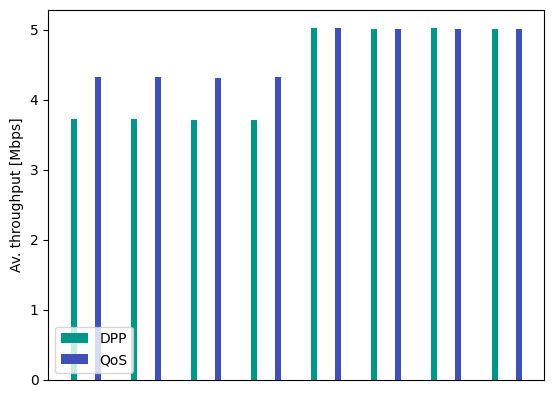

In [4]:

vrues=[0,1,2,3,4]
cgues=[1,2,3,4]

# CGgbrDLs=[ 1e6, 5e6, 10e6, 15e6, 20e6, 25e6, 30e6, 35e6, 40e6]
CGgbrDLs=[ 1e6, 5e6]
# CGgbrDL= 15e6
# Datarates=[1, 5, 10, 15, 20, 25, 30, 35, 40]
Datarates=[1, 5]

# resDPP_1_DR_1_GFBR_1_CG_0_VR
for Datarate in Datarates:
    for CGgbrDL in CGgbrDLs:
         for cg in cgues:
              for vr in vrues:
# Run schedulers
                filepath = f'{cg}_CG_{vr}_VR'
                f"sim_DR_GFBR_analysis/{filepath}"
                # Read data
                dpp = []

                thput = []
                with open(f'sim_DR_GFBR_analysis/{filepath}/resDPP_{Datarate}_DR_{int(CGgbrDL/1e6)}_GFBR_{cg}_CG_{vr}_VR.txt') as File:
                        reader = csv.reader(File, delimiter='\t', quotechar=',',
                                                quoting=csv.QUOTE_MINIMAL)
                        for row in reader:
                                if row[0] != "Thput":
                                        thput.append(float(row[0]))
                        dpp.append(thput)
                dpp = np.array(dpp).mean(0)



                qos = []

                thput = []
                with open(f'sim_DR_GFBR_analysis/{filepath}/resQos_{Datarate}_DR_{int(CGgbrDL/1e6)}_GFBR_{cg}_CG_{vr}_VR.txt') as File:
                        reader = csv.reader(File, delimiter='\t', quotechar=',',
                                                quoting=csv.QUOTE_MINIMAL)
                        for row in reader:
                                if row[0] != 'Thput':
                                        thput.append(float(row[0]))
                        qos.append(thput)
                qos = np.array(qos).mean(0)

# Plot
plt.figure()
x = np.arange(len(thput))
plt.bar(x-0.2, dpp, 0.1, label='DPP', color='#009688')

plt.bar(x+0.2, qos, 0.1, label='QoS', color='#3f51b5')
plt.ylabel("Av. throughput [Mbps]")
plt.xticks([])
plt.legend(loc='lower left')